# NB - Tiktok

In [2]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Importar modelo NB y cargar datos

In [3]:
from src.trainers.utils import build_datasets
from constants.constants_tiktok import TIKTOK_DATASET_SENTENCES

dataset_train, dataset_test, dataset_val = build_datasets(
    TIKTOK_DATASET_SENTENCES,
    test_size=0.3,
    val_size=0.5,
    random_state=42,
    undersampling=True
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

Train: 20.32%
Test: 4.36%
Val: 4.36%
(13727, 2)
(2942, 2)
(2942, 2)


## Hiperparámetros

In [3]:
import numpy as np

list_vectorizers = ["tfidf", "bow"]
list_alpha = np.logspace(-3, 1, 20)
print(list_alpha)

[1.00000000e-03 1.62377674e-03 2.63665090e-03 4.28133240e-03
 6.95192796e-03 1.12883789e-02 1.83298071e-02 2.97635144e-02
 4.83293024e-02 7.84759970e-02 1.27427499e-01 2.06913808e-01
 3.35981829e-01 5.45559478e-01 8.85866790e-01 1.43844989e+00
 2.33572147e+00 3.79269019e+00 6.15848211e+00 1.00000000e+01]


## Entrenar modelos

In [ ]:
from src.trainers.train_nb import train_nb
from src.trainers.utils import save_model, save_metrics
from constants.constants_tiktok import NB_PIPELINE_PATH, TIKTOK_NB_METRICS_PATH

best_accuracy = -1
for vectorizer in list_vectorizers:
    for alpha in list_alpha:
        pipeline, metrics = train_nb(
            dataset_train, dataset_val,
            alpha=alpha, vec=vectorizer
        )
        print(f"[NB {vectorizer} {alpha:.2f}] acc: {metrics['accuracy']:.4f}")
        save_metrics(metrics, TIKTOK_NB_METRICS_PATH)
        if metrics['accuracy'] > best_accuracy:
            best_accuracy = metrics['accuracy']
            save_model(pipeline, NB_PIPELINE_PATH)

[NB tfidf 0.00] acc: 0.6125
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
[NB tfidf 0.00] acc: 0.6139
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
[NB tfidf 0.00] acc: 0.6149
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
[NB tfidf 0.00] acc: 0.6162
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
[NB tfidf 0.01] acc: 0.6173
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
[NB tfidf 0.01] acc: 0.6220
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
[NB tfidf 0.02] acc: 0.6261
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl
[NB tfidf 0.03] acc: 0.6281
Modelo guardado en: c:\Users\Diego\Desktop\senti

## Modelo con mayor accuracy

In [5]:
# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TIKTOK_NB_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
print(best_acc)

accuracy      0.665534
recall        0.665452
precision     0.664144
f1_score       0.65254
model               NB
vectorizer       tfidf
alpha          3.79269
vocab_size        9046
train_time    0.130455
Name: 17, dtype: object


Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\nb_pipeline.pkl

Naive Bayes
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1059
           1       0.43      0.66      0.52       648
           2       0.86      0.68      0.76      1235

    accuracy                           0.67      2942
   macro avg       0.67      0.67      0.66      2942
weighted avg       0.71      0.67      0.68      2942

Matriz de confusión


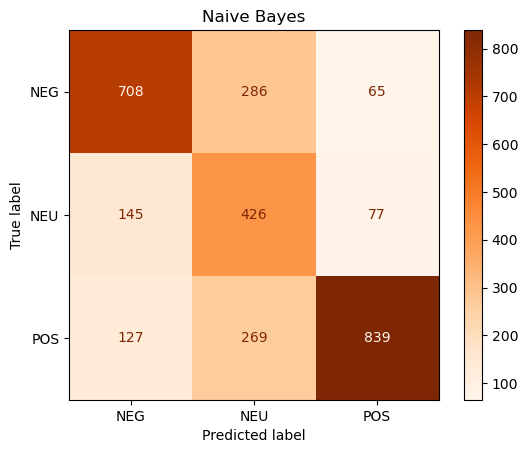

{'accuracy': 0.6706322229775663,
 'recall': 0.6706498297586109,
 'precision': 0.6684382916404189,
 'f1_score': 0.658232847371207}

In [5]:
from src.trainers.utils import load_model
from src.trainers.utils import evaluate_model
from constants.constants_tiktok import NB_PIPELINE_PATH

# Evaluar modelo con datos de prueba
pipeline = load_model(NB_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test, title="Naive Bayes")
display(metrics)

## Test

In [10]:
from constants.constants_nlp import INDEX_TO_POLARITY
from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

textos_test = ["Hola! cómo estás???😀","el dia de hoy estoy feliz y contento", "estoy muy triste", "Me encuentro estudiando para un exámen", "A veces me encuentro triste, pero la mayoria del tiempo estoy muy feliz"]
textos_test = list(map(lambda x: clean_text(x), textos_test))
textos_test = preprocesamiento(textos_test)

preds = pipeline.predict(textos_test)
for input, pred in zip(textos_test,preds):
    print(f"{input}: {INDEX_TO_POLARITY[pred]}")

Modelo cargado: es_core_news_sm
Aplicando stemming...
Total de documentos preprocesados: 5
hol estar: NEU
feliz content: POS
trist: NEG
encontr estudi exam: NEU
encontr trist mayor tiemp feliz: POS
